In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.manifold import TSNE,MDS
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler


import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos

In [2]:
dictfile="/home/oszwaldo/Documentos/Datos/Country-data/data-dictionary.csv"
dic=pd.read_csv(dictfile)
dic

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [3]:
filename='/home/oszwaldo/Documentos/Datos/Country-data/Country-data.csv'
df=pd.read_csv(filename)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Visualización de multiples dimensiones

In [4]:
varc=[i for i in df.columns if i != 'country']
X=df[varc]

In [5]:
sc = StandardScaler()
sc.fit(X)
Xs = pd.DataFrame(sc.transform(X),columns=varc)

No podemos utilizar componentes principales por que no acumulan la suficiente varianza

In [35]:
pca = PCA(n_components=2)
pca.fit(Xs)
pca.explained_variance_ratio_.cumsum()

array([0.4595174 , 0.63133365])

In [6]:
mds = MDS(n_components=2,n_jobs=-1)
tsne = TSNE(n_components=2,n_jobs=-1)

Xm = pd.DataFrame(mds.fit_transform(X),columns=['d1','d2'])
Xt = pd.DataFrame(tsne.fit_transform(X),columns=['d1','d2'])

No podemos notar una separación clara en diferentes clusters.

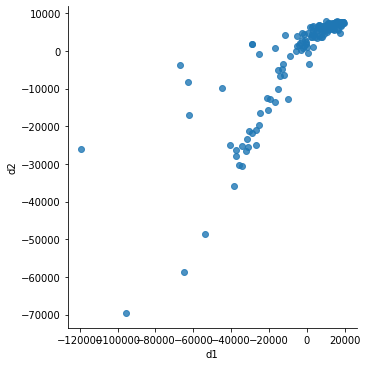

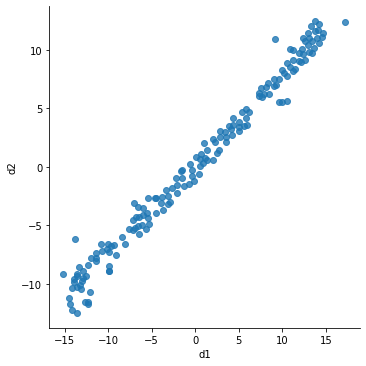

In [7]:
sns.lmplot(data=Xm,x='d1',y='d2',fit_reg=False)
sns.lmplot(data=Xt,x='d1',y='d2',fit_reg=False)

# Modelos

## Modelo no supervisado aglomerativo

La metodología que se sigue es la de *Hirarchical clustering*, se busca agrupar a los datos más parecidos usando alguna función de distancia, euclidiana en este caso, y cuando ya hay clusters formados se elige un método, ward en este caso, para probar la vinculación entre los clusters, el *linkage*.

In [12]:
cluster = AgglomerativeClustering(n_clusters=2,linkage='average')

In [9]:
sc = MinMaxScaler()
Xs = pd.DataFrame(sc.fit_transform(X),columns=varc)

In [13]:
Xs['cl']=Xm['cl'] =Xt['cl'] =cluster.fit_predict(Xs)

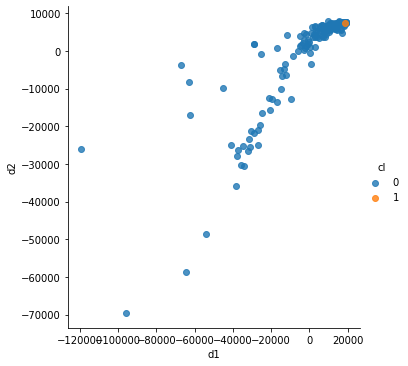

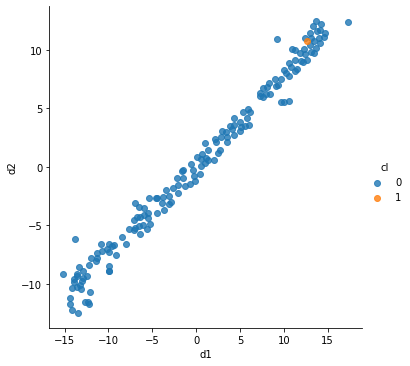

In [14]:
sns.lmplot(data=Xm,x='d1',y='d2',fit_reg=False,hue='cl')
sns.lmplot(data=Xt,x='d1',y='d2',fit_reg=False,hue='cl')